In [13]:
import pandas as pd
import os
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [14]:
df=pd.read_csv("..\..\zero_shot_results.csv") # path to results of embedding zero-shot

In [15]:
df.head()

,Unnamed: 0,Company,year,text,zero_shot_results
0,0,Porsche,2016,Augmented reality makes the fascination of Por...,"[['E1', 0.7216381414092714], ['G1', 0.71392756..."
1,1,Porsche,2016,"and encourage you, to confront, challenge and ...","[['G1', 0.8020255128630671], ['S1', 0.77849351..."
2,2,Porsche,2016,"For inspiration, consider the information re g...","[['G1', 0.7796663944733939], ['E1', 0.76584494..."
3,3,Porsche,2016,The second volume is called Performance and co...,"[['E1', 0.7976808365273889], ['G1', 0.77505116..."
4,4,Porsche,2016,"The two volumes may be different, but they hav...","[['E1', 0.7502377571581], ['E3', 0.74065766843..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149083 entries, 0 to 149082
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         149083 non-null  int64 
 1   Company            149083 non-null  object
 2   year               149083 non-null  int64 
 3   text               149083 non-null  object
 4   zero_shot_results  149083 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.7+ MB


In [17]:
# split zero_shot resluts into top label and score assosiated with it
def float_str_split(df_in):
    df=df_in.copy()
    label=[]
    top_result=[]
    for i in range(0,len(df)):
        label.append(df.zero_shot_results[i][3:5])
        top_result.append(float(df.zero_shot_results[i][8:20]))
    return label, top_result

In [18]:
label,top_result=float_str_split(df)
results_df=pd.DataFrame(zip(label,top_result),columns=["label","sim_score"])

In [19]:
results_df.head()

,label,sim_score
0,E1,0.721638
1,G1,0.802026
2,G1,0.779666
3,E1,0.797681
4,E1,0.750238


<Axes: >

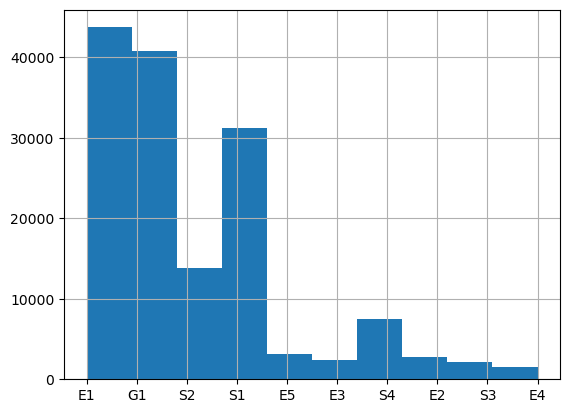

In [20]:
results_df.label.hist()

(0.6981979417568, 0.846607801584)

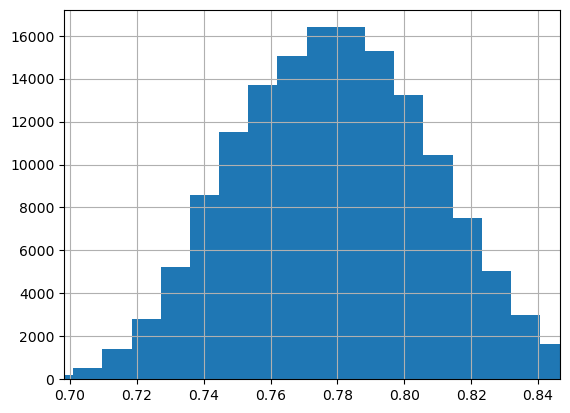

In [21]:
# Plot distribution of scores, it follows a normal distribution
ax=results_df.sim_score.hist(bins=100)
ax.set_xlim(results_df.sim_score.quantile(.001),results_df.sim_score.quantile(.99))

In [22]:
mu, std = norm.fit(results_df.sim_score)

In [26]:
print("Mean of the sim score = {}".format(mu))
print("Std of the sim score = {}".format(std))

Mean of the sim score = 0.7792157798909324
Std of the sim score = 0.029628744182360146


In [28]:
x = np.linspace(results_df.sim_score.quantile(.001), results_df.sim_score.quantile(.99), 100)
p = norm.pdf(x, mu, std)

In [46]:
import matplotlib.pyplot as plt

(0.6981979417568, 0.846607801584)

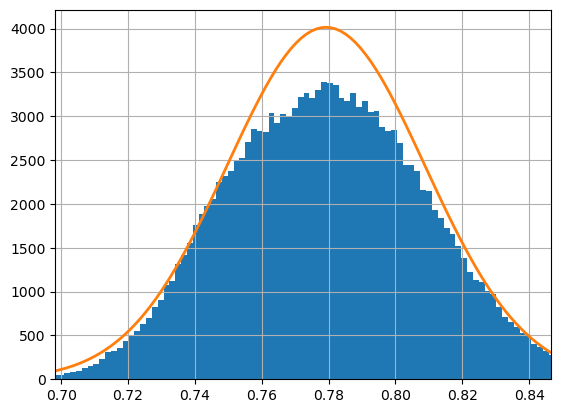

In [53]:
ax =results_df.sim_score.hist(bins=500)
plt.plot(x, p*len(results_df)/500, lw=2)
ax.set_xlim(results_df.sim_score.quantile(.001),results_df.sim_score.quantile(.99))
